## Install libraries

In [1]:
pip install plot_keras_history

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Importing libraries

In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import re

from keras.layers import Input, LSTM, Activation, Lambda, Dense, Embedding, Dropout, Bidirectional, GlobalMaxPool1D, Flatten
from keras import backend as K
from keras.models import Model, Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from plot_keras_history import plot_history
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Reading the pre-processed csv file

In [39]:
preprocessed_data = pd.read_csv('../Project/train-balanced-sarcasm-preprocessed.csv',sep = ',')
preprocessed_data.shape

(50000, 3)

In [40]:
preprocessed_data['label'].value_counts()

0    25000
1    25000
Name: label, dtype: int64

# **Let's perform BiLSTM for 'comment'**

## Reading Inputs for the model

In [41]:
EMBED_SIZE = 128
max_length = 10000
oov_tok = "<OOV>"
training_size = int(round(preprocessed_data['label'].count(), -1) * 0.8)
print(training_size)

40000


In [ ]:
comments = preprocessed_data['comment']
labels = preprocessed_data['label']
train_data = comments[0:training_size]
train_label = labels[0:training_size]
test_data = comments[training_size:]
test_label = labels[training_size:]

In [43]:
VOCAB_SIZE = 10000
tokenizer = Tokenizer(num_words=VOCAB_SIZE,oov_token=oov_tok)
tokenizer.fit_on_texts(train_data)

word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_data)
padded_train_data = pad_sequences(train_sequences, padding='post', truncating='post', maxlen=max_length)

test_sequences = tokenizer.texts_to_sequences(test_data)
padded_test_data = pad_sequences(test_sequences, padding='post', truncating='post', maxlen=max_length)

In [44]:
print('Length of sample train_data before preprocessing:', len(train_data[0]))
print('Length of sample train_data after preprocessing:', len(padded_train_data[0]))
print('Sample train data:', padded_train_data[0])
print('Sample train label:', train_label[0])

Length of sample train_data before preprocessing: 10
Length of sample train_data after preprocessing: 10000
Sample train data: [4280   10 7638 ...    0    0    0]
Sample train label: 0


In [45]:
train_sequences = np.array(train_sequences)
padded_train_data = np.array(padded_train_data)
test_sequences = np.array(test_sequences)
padded_test_data = np.array(padded_test_data)

## Building the Model

In [46]:
lstm_model=Sequential()
lstm_model.add(Embedding(VOCAB_SIZE,EMBED_SIZE,input_length=max_length))
lstm_model.add(Dropout(0.5))
lstm_model.add(Bidirectional(LSTM(100)))
lstm_model.add(Dropout(0.5))
lstm_model.add(Flatten())
lstm_model.add(Dense(1,activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10000, 128)        1280000   
                                                                 
 dropout_4 (Dropout)         (None, 10000, 128)        0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 200)              183200    
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 200)               0         
                                                                 
 flatten_2 (Flatten)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                      

## Train the Model

In [50]:
lstm_history = lstm_model.fit(padded_train_data, train_label, epochs=10, batch_size=128, validation_split=0.1, verbose=1)

Epoch 1/10
282/282 [==============================] - 208s 736ms/step - loss: 0.2500 - accuracy: 0.8943 - val_loss: 2.1058 - val_accuracy: 0.4205
Epoch 2/10
282/282 [==============================] - 207s 735ms/step - loss: 0.2373 - accuracy: 0.9003 - val_loss: 1.9380 - val_accuracy: 0.4523
Epoch 3/10
282/282 [==============================] - 207s 735ms/step - loss: 0.2233 - accuracy: 0.9053 - val_loss: 1.9383 - val_accuracy: 0.4405
Epoch 4/10
282/282 [==============================] - 207s 734ms/step - loss: 0.2123 - accuracy: 0.9108 - val_loss: 2.4561 - val_accuracy: 0.3790
Epoch 5/10
282/282 [==============================] - 221s 784ms/step - loss: 0.2032 - accuracy: 0.9143 - val_loss: 2.4777 - val_accuracy: 0.4200
Epoch 6/10
282/282 [==============================] - 211s 747ms/step - loss: 0.1946 - accuracy: 0.9184 - val_loss: 2.2800 - val_accuracy: 0.4478
Epoch 7/10
282/282 [==============================] - 208s 738ms/step - loss: 0.1857 - accuracy: 0.9213 - val_loss: 2.6261 -

## Visualize the model plot

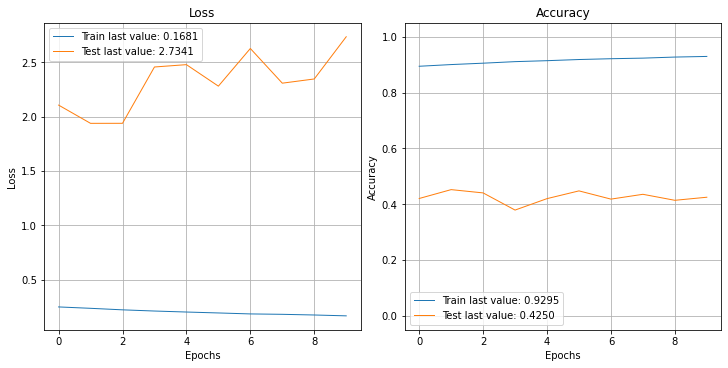

In [51]:
plot_history(lstm_history.history, path="standard_comment_1.png")
plt.show()

## Evaluate the model

In [52]:
preprocessed_data[preprocessed_data['label']==1].sample(10)

,label,comment,parent_comment
45259,1,gotta have full health for round 2.,seriously ! even if i am friggn mercy i push m...
40247,1,we did it reddit !,same-sex couples can now adopt children in all...
33489,1,reported for unsportsmanlike conduct you afk c...,yeah my bad ! i am mostly afk
25392,1,yeh a *real man* would have thrown the baby in...,""" what kind of man is getting his arse kicked ..."
33198,1,"drop them both , they can only go down from here","who should be more worried , adrian peterson o..."
43768,1,"whatever losers , i got a stag so i am basical...",it is so bizarre how many people are putting s...
47816,1,*come to browse thread with no intention of bu...,a game where i can make a house and feel at ho...
38170,1,but what about tebow ?,"mets hopeful that degrom , matz , duda , and l..."
42714,1,but macs can never be hacked !,5 essential tips for being pcmr in a apple hou...
36782,1,manlets are not people,"i am not racist , some of my best friends are ..."


In [53]:
preprocessed_data[preprocessed_data['label']==0].sample(10)

,label,comment,parent_comment
19755,0,"i think they ignore the old testament , except...",exodus 20 : 7 god will not leave this unpunished.
18777,0,then you not really with the shits fam simple ...,hell no i did not bring a banana
2024,0,only the new york district court said it was u...,lester just told you stop and frisk was ruled ...
17343,0,gg downvoted correcting someone when that some...,correct yourself before you correct others. *p...
6869,0,double sheen on q is actually reasonable to re...,the only one of these that actually sounds pla...
1488,0,"do you have "" looking for everyone "" selected ?",why are there so many guys in my quickmatch ? ...
14323,0,same for .cfm,this is frustrating. working with .phtml files...
9684,0,they voted with their brains and not with thei...,why so many women abandoned hillary clinton.
20581,0,means,"if necessity is the mother of invention , than..."
15687,0,was he by any chance a mormon ?,i have an awful one. when i was in kindergarte...


In [54]:
lstm_results = lstm_model.evaluate(padded_test_data, test_label, batch_size=128)
print('test_loss:', lstm_results[0], 'test_accuracy:', lstm_results[1])

79/79 [==============================] - 23s 284ms/step - loss: 2.6215 - accuracy: 0.4302
test_loss: 2.621488571166992 test_accuracy: 0.4302000105381012


### *Predicting the probability of sentence being sarcastic*

In [55]:
# Case 1 : Universal statement
sent1 = "sun sets in the west"
sent1 = tokenizer.texts_to_sequences([sent1])
sent1 = pad_sequences(sent1, maxlen = max_length)

# Make the prediction.
prediction = lstm_model.predict(sent1)
print("The probability of sent1 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent1 being sarcastic is 12.120 percent


In [56]:
# Case 2 : Non-Sarcastic statement 
sent2 = "totally untrue. hong kong english sucks."           # passing a value from parent_comment column
sent2 = tokenizer.texts_to_sequences([sent2])
sent2 = pad_sequences(sent2, maxlen = max_length)

prediction = lstm_model.predict(sent2)
print("The probability of sent2 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent2 being sarcastic is 14.244 percent


In [57]:
# Case 2 : Non-Sarcastic statement 
sent2_1 = "guess you have not heard malaysian or filipino english."      # passing a value from comment column
sent2_1 = tokenizer.texts_to_sequences([sent2_1])
sent2_1 = pad_sequences(sent2_1, maxlen = max_length)

prediction = lstm_model.predict(sent2_1)
print("The probability of sent2_1 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent2_1 being sarcastic is 14.127 percent


In [58]:
# Case 3 : Sarcastic statement statement
sent3 = "5s teams and 3s teams names are swapped with each other"             # passing a value from parent_comment column
sent3 = tokenizer.texts_to_sequences([sent3])
sent3 = pad_sequences(sent3, maxlen = max_length)

prediction = lstm_model.predict(sent3)
print("The probability of sent3 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent3 being sarcastic is 13.043 percent


In [59]:
# Case 3 : Sarcastic statement statement
sent3_1 = "not even riot cares about ranked teams"           # passing a value from comment column
sent3_1 = tokenizer.texts_to_sequences([sent3_1])
sent3_1 = pad_sequences(sent3_1, maxlen = max_length)

prediction = lstm_model.predict(sent3_1)
print("The probability of sent3_1 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent3_1 being sarcastic is 10.183 percent


# **Let's perform BiLSTM for 'parent_comment'**

## Reading Inputs for the model

In [60]:
parent_comments = preprocessed_data['parent_comment']
labels = preprocessed_data['label']
train_data_parent = parent_comments[0:training_size]
train_label_parent = labels[0:training_size]
test_data_parent = parent_comments[training_size:]
test_label_parent = labels[training_size:]

In [61]:
VOCAB_SIZE = 10000
tokenizer = Tokenizer(num_words=VOCAB_SIZE,oov_token=oov_tok)
tokenizer.fit_on_texts(train_data_parent)

word_index = tokenizer.word_index

train_sequences_parent = tokenizer.texts_to_sequences(train_data_parent)
padded_train_data_parent = pad_sequences(train_sequences_parent, padding='post', truncating='post', maxlen=max_length)

test_sequences_parent = tokenizer.texts_to_sequences(test_data_parent)
padded_test_data_parent = pad_sequences(test_sequences_parent, padding='post', truncating='post', maxlen=max_length)

In [62]:
train_sequences_parent = np.array(train_sequences_parent)
padded_train_data_parent = np.array(padded_train_data_parent)
test_sequences_parent = np.array(test_sequences_parent)
padded_test_data_parent = np.array(padded_test_data_parent)

## Building the Model

In [63]:
lstm_model_parent=Sequential()
lstm_model_parent.add(Embedding(VOCAB_SIZE,EMBED_SIZE,input_length=max_length))
lstm_model_parent.add(Dropout(0.5))
lstm_model_parent.add(Bidirectional(LSTM(100)))
lstm_model_parent.add(Dropout(0.5))
lstm_model_parent.add(Flatten())
lstm_model_parent.add(Dense(1,activation='sigmoid'))

In [64]:
lstm_model_parent.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
lstm_model_parent.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 10000, 128)        1280000   
                                                                 
 dropout_6 (Dropout)         (None, 10000, 128)        0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 200)              183200    
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 200)               0         
                                                                 
 flatten_3 (Flatten)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                      

## Train the Model

In [65]:
lstm_history_parent = lstm_model_parent.fit(padded_train_data_parent, 
                                            train_label_parent, epochs=10, 
                                            batch_size=128, 
                                            validation_split=0.1, 
                                            verbose=1)

Epoch 1/10
282/282 [==============================] - 211s 737ms/step - loss: 0.6141 - accuracy: 0.6939 - val_loss: 1.0141 - val_accuracy: 0.0033
Epoch 2/10
282/282 [==============================] - 208s 736ms/step - loss: 0.5867 - accuracy: 0.7036 - val_loss: 1.1502 - val_accuracy: 0.0865
Epoch 3/10
282/282 [==============================] - 207s 733ms/step - loss: 0.5447 - accuracy: 0.7292 - val_loss: 1.1278 - val_accuracy: 0.2085
Epoch 4/10
282/282 [==============================] - 206s 731ms/step - loss: 0.4952 - accuracy: 0.7634 - val_loss: 1.3396 - val_accuracy: 0.2345
Epoch 5/10
282/282 [==============================] - 206s 732ms/step - loss: 0.4503 - accuracy: 0.7916 - val_loss: 1.4122 - val_accuracy: 0.2862
Epoch 6/10
282/282 [==============================] - 207s 733ms/step - loss: 0.4080 - accuracy: 0.8126 - val_loss: 1.7290 - val_accuracy: 0.2307
Epoch 7/10
282/282 [==============================] - 206s 732ms/step - loss: 0.3744 - accuracy: 0.8313 - val_loss: 1.6809 -

## Visualize the model plot

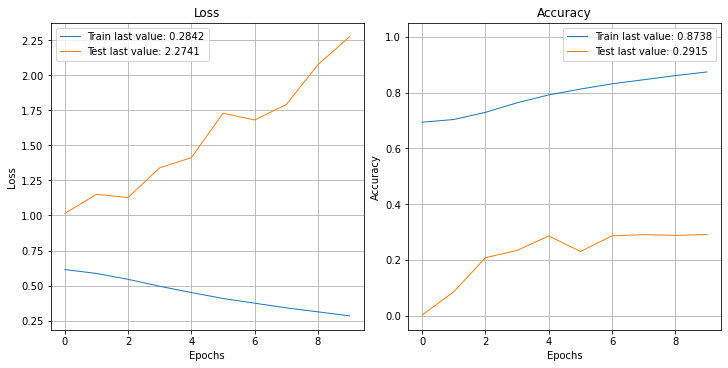

In [66]:
plot_history(lstm_history_parent.history, path="standard_parent.png")
plt.show()

## Evaluate the model

### *Predicting the probability of sentence being sarcastic*

In [67]:
from keras.callbacks import History
# Case 1 : Universal statement
sent4 = "sun sets in the west"
sent4 = tokenizer.texts_to_sequences([sent4])
sent4 = pad_sequences(sent4, maxlen = max_length)

prediction = lstm_model_parent.predict(sent4)
print("The probability of sent4 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent4 being sarcastic is 23.685 percent


In [68]:
# Case 2 : Non-Sarcastic statement 
sent5 = "totally untrue. hong kong english sucks."           # passing a value from parent_comment column
sent5 = tokenizer.texts_to_sequences([sent5])
sent5 = pad_sequences(sent5, maxlen = max_length)

prediction = lstm_model_parent.predict(sent5)
print("The probability of sent5 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent5 being sarcastic is 21.343 percent


In [69]:
# Case 2 : Non-Sarcastic statement 
sent5_1 = "guess you have not heard malaysian or filipino english."           # passing a value from comment column
sent5_1 = tokenizer.texts_to_sequences([sent5_1])
sent5_1 = pad_sequences(sent5_1, maxlen = max_length)

prediction = lstm_model_parent.predict(sent5_1)
print("The probability of sent5_1 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent5_1 being sarcastic is 22.192 percent


In [74]:
# Case 3 : Sarcastic statement 
sent6 = "5s teams and 3s teams names are swapped with each other"           # passing a value from parent_comment column
sent6 = tokenizer.texts_to_sequences([sent6])
sent6 = pad_sequences(sent6, maxlen = max_length)

prediction = lstm_model_parent.predict(sent6)
print("The probability of sent6 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent6 being sarcastic is 21.218 percent


In [75]:
# Case 3 : Sarcastic statement 
sent6_1 = "not even riot cares about ranked teams"           # passing a value from comment column
sent6_1 = tokenizer.texts_to_sequences([sent6_1])
sent6_1 = pad_sequences(sent6_1, maxlen = max_length)

prediction = lstm_model_parent.predict(sent6_1)
print("The probability of sent6_1 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent6_1 being sarcastic is 24.361 percent


In [76]:
lstm_results_parent = lstm_model_parent.evaluate(padded_test_data_parent, test_label_parent, batch_size=128)
print('test_loss:', lstm_results_parent[0], 'test_accuracy:', lstm_results_parent[1])

79/79 [==============================] - 23s 285ms/step - loss: 2.2290 - accuracy: 0.2998
test_loss: 2.2290143966674805 test_accuracy: 0.29980000853538513


# **Let's perform BiLSTM for 'comment and parent_comment'**

## Reading Inputs for the model

### *Concatenating 'comment' and 'parent_comment'*

In [92]:
comments = preprocessed_data['comment']
parent_comments = preprocessed_data['parent_comment']
labels = preprocessed_data['label']

concat_comments = []
comm = ''
for i in range (len(parent_comments)):
    comm = comments[i] + ' <SEP> ' + parent_comments[i]
    if (comm != ''):
        concat_comments.append(comm)
        comm = ''

concat_comments = np.array(concat_comments)
concat_comments = pd.Series(concat_comments, copy=False)

In [102]:
concat_train_data = concat_comments[0:training_size]
concat_train_label = labels[0:training_size]
concat_test_data = concat_comments[training_size:]
concat_test_label = labels[training_size:]

In [103]:
VOCAB_SIZE = 10000
tokenizer = Tokenizer(num_words=VOCAB_SIZE,oov_token=oov_tok)
tokenizer.fit_on_texts(concat_train_data)

word_index = tokenizer.word_index

concat_train_sequences = tokenizer.texts_to_sequences(concat_train_data)
concat_padded_train_data = pad_sequences(concat_train_sequences, padding='post', truncating='post', maxlen=max_length)

concat_test_sequences = tokenizer.texts_to_sequences(concat_test_data)
concat_padded_test_data = pad_sequences(concat_test_sequences, padding='post', truncating='post', maxlen=max_length)

In [104]:
concat_train_sequences = np.array(concat_train_sequences)
concat_padded_train_data = np.array(concat_padded_train_data)
concat_test_sequences = np.array(concat_test_sequences)
concat_padded_test_data = np.array(concat_padded_test_data)

## Building the model

In [106]:
concat_lstm_model=Sequential()
concat_lstm_model.add(Embedding(VOCAB_SIZE,EMBED_SIZE,input_length=max_length))
concat_lstm_model.add(Dropout(0.5))
concat_lstm_model.add(Bidirectional(LSTM(100)))
concat_lstm_model.add(Dropout(0.5))
concat_lstm_model.add(Flatten())
concat_lstm_model.add(Dense(1,activation='sigmoid'))
concat_lstm_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [107]:
concat_lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 10000, 128)        1280000   
                                                                 
 dropout_8 (Dropout)         (None, 10000, 128)        0         
                                                                 
 bidirectional_4 (Bidirectio  (None, 200)              183200    
 nal)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 200)               0         
                                                                 
 flatten_4 (Flatten)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 201       
                                                      

## Train the model

In [108]:
concat_lstm_history = concat_lstm_model.fit(concat_padded_train_data, concat_train_label, epochs=10, batch_size=128, validation_split=0.1, verbose=1)

Epoch 1/10
282/282 [==============================] - 212s 738ms/step - loss: 0.5674 - accuracy: 0.7234 - val_loss: 1.0501 - val_accuracy: 0.2977
Epoch 2/10
282/282 [==============================] - 208s 737ms/step - loss: 0.4933 - accuracy: 0.7694 - val_loss: 1.2544 - val_accuracy: 0.2955
Epoch 3/10
282/282 [==============================] - 208s 737ms/step - loss: 0.4469 - accuracy: 0.7997 - val_loss: 1.1408 - val_accuracy: 0.3668
Epoch 4/10
282/282 [==============================] - 207s 733ms/step - loss: 0.4026 - accuracy: 0.8213 - val_loss: 1.1801 - val_accuracy: 0.4110
Epoch 5/10
282/282 [==============================] - 209s 740ms/step - loss: 0.3628 - accuracy: 0.8438 - val_loss: 1.1473 - val_accuracy: 0.4552
Epoch 6/10
282/282 [==============================] - 207s 733ms/step - loss: 0.3260 - accuracy: 0.8616 - val_loss: 1.4304 - val_accuracy: 0.4035
Epoch 7/10
282/282 [==============================] - 207s 733ms/step - loss: 0.2931 - accuracy: 0.8783 - val_loss: 1.4441 -

## Visualise the model plot

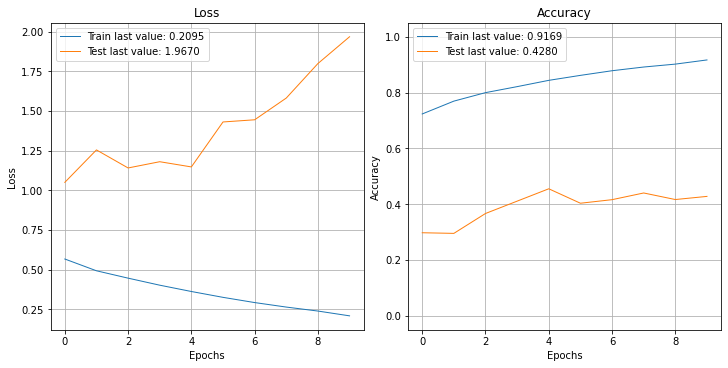

In [109]:
plot_history(concat_lstm_history.history, path="concat_standard.png")
plt.show()

## Evaluate the model

### *Predicting the probability of sentence being sarcastic*

In [110]:
# Case 1 : Universal statement
sent7 = "sun sets in the west"
sent7 = tokenizer.texts_to_sequences([sent7])
sent7 = pad_sequences(sent7, maxlen = max_length)

prediction = concat_lstm_model.predict(sent7)
print("The probability of sent7 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent7 being sarcastic is 2.796 percent


In [111]:
# Case 2 : Non-Sarcastic statement 
sent8 = "totally untrue. hong kong english sucks."           # passing a value from parent_comment column
sent8 = tokenizer.texts_to_sequences([sent8])
sent8 = pad_sequences(sent8, maxlen = max_length)

prediction = concat_lstm_model.predict(sent8)
print("The probability of sent8 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent8 being sarcastic is 3.059 percent


In [112]:
# Case 2 : Non-Sarcastic statement 
sent8_1 = "guess you have not heard malaysian or filipino english."           # passing a value from comment column
sent8_1 = tokenizer.texts_to_sequences([sent8_1])
sent8_1 = pad_sequences(sent8_1, maxlen = max_length)

prediction = concat_lstm_model.predict(sent8_1)
print("The probability of sent8_1 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent8_1 being sarcastic is 2.761 percent


In [113]:
# Case 3 : Sarcastic statement 
sent9 = "5s teams and 3s teams names are swapped with each other"           # passing a value from parent_comment column
sent9 = tokenizer.texts_to_sequences([sent9])
sent9 = pad_sequences(sent9, maxlen = max_length)

prediction = concat_lstm_model.predict(sent9)
print("The probability of sent9 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent9 being sarcastic is 2.882 percent


In [114]:
# Case 3 : Sarcastic statement 
sent9_1 = "not even riot cares about ranked teams"           # passing a value from comment column
sent9_1 = tokenizer.texts_to_sequences([sent9_1])
sent9_1 = pad_sequences(sent9_1, maxlen = max_length)

prediction = concat_lstm_model.predict(sent9_1)
print("The probability of sent9_1 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent9_1 being sarcastic is 2.888 percent


In [115]:
concat_lstm_results = concat_lstm_model.evaluate(concat_padded_test_data, concat_test_label, batch_size=128)
print('test_loss:', concat_lstm_results[0], 'test_accuracy:', concat_lstm_results[1])

79/79 [==============================] - 22s 284ms/step - loss: 1.9135 - accuracy: 0.4411
test_loss: 1.9134784936904907 test_accuracy: 0.44110000133514404
